Epoch 100/2000, Loss: 0.018519
Epoch 200/2000, Loss: 0.017445
Epoch 300/2000, Loss: 0.016766
Epoch 400/2000, Loss: 0.016185
Epoch 500/2000, Loss: 0.015719
Epoch 600/2000, Loss: 0.015350
Epoch 700/2000, Loss: 0.015042
Epoch 800/2000, Loss: 0.014778
Epoch 900/2000, Loss: 0.014537
Epoch 1000/2000, Loss: 0.014312
Epoch 1100/2000, Loss: 0.014108
Epoch 1200/2000, Loss: 0.013895
Epoch 1300/2000, Loss: 0.013731
Epoch 1400/2000, Loss: 0.013526
Epoch 1500/2000, Loss: 0.013361
Epoch 1600/2000, Loss: 0.013211
Epoch 1700/2000, Loss: 0.013075
Epoch 1800/2000, Loss: 0.012957
Epoch 1900/2000, Loss: 0.013665
Epoch 2000/2000, Loss: 0.012755


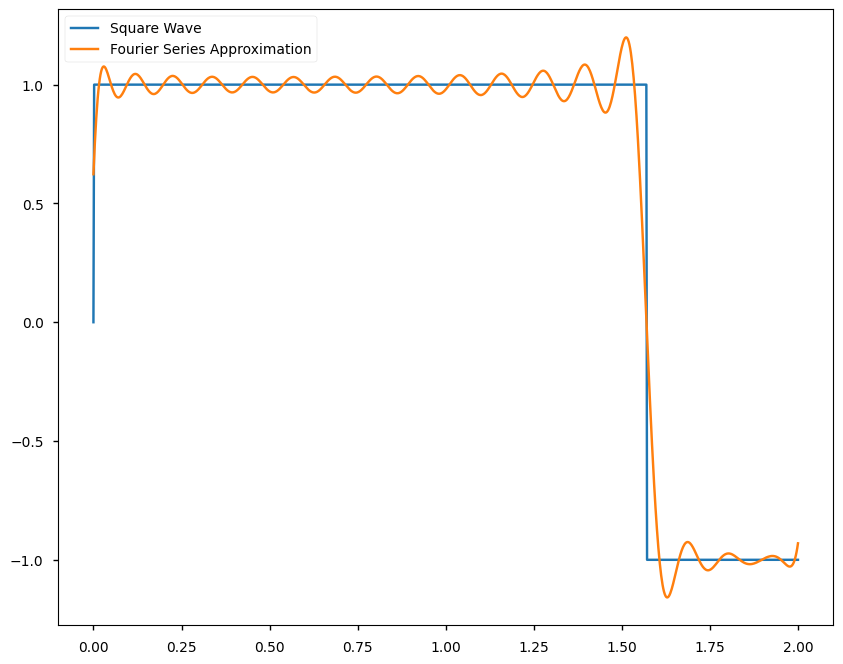

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random

# %%
N = 50

num_points = 1000
epochs = 2000
lr = 0.1

x_start = random.randint(int(-1 * np.pi), 0)  
x_end = random.randint(0, int(1 * np.pi))  
x = torch.linspace(x_start, x_end, num_points).unsqueeze(1)

y_true = torch.sign(torch.tan(x))

class FourierSeries(nn.Module):
    def __init__(self, N):
        super().__init__()
        self.N = N
        
        self.a0 = nn.Parameter(torch.randn(1))
        self.an = nn.Parameter(torch.randn(N))
        self.bn = nn.Parameter(torch.randn(N))
    
    def forward(self, x):
        result = self.a0.expand_as(x)
        for n in range(1, self.N+1):
            result = result + self.an[n-1] * torch.cos(n * x) + self.bn[n-1] * torch.sin(n * x)
        return result


model = FourierSeries(N)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

criterion = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y_true)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")


with torch.no_grad():
    y_pred = model(x)

plt.style.use("seaborn-v0_8-notebook")

plt.figure(figsize=(10, 8))
plt.plot(x.numpy(), y_true.numpy(), label='Square Wave ')
plt.plot(x.numpy(), y_pred.numpy(), label='Fourier Series Approximation')
plt.legend()
plt.show()